In [1]:
import numpy as np
import matplotlib.pyplot as pl

# Modeling the low-pass filter

The idea is that we have a circuit like so:

![Op Amp Low Pass Filter](opamp_circuit_small.png)

This is an RC circuit followed by a $x2$ amplifier. First consider the RC portion. It's like a voltage divider! If you replaced the $C$ with an $R_2$ you'd simply apply Ohm's Law to compute the current:

$$I =\frac{V_{in}}{R + R_2}$$

And compute the voltage accross $R_2$ of:

$$V_2 = R_2 I = R_2 \frac{V_{in}}{R + R_2}$$

But this case is very similar: The AC reactance of the capacitor is:

$$X_C = \frac{1}{\omega C}$$

The *impedance* of the series combination of $X_C$ and $R$ is:

$$ Z = \sqrt{R^2 + X_C^2} $$ 

since the voltage accross the resistor is $90^\circ$ out of phase with the voltage accross the capacitor.

The current through the RC combination is:

$$ I = V_{in}/Z $$

The voltage accross the capacitor is just:

$$V_C = X_C I = X_C \frac{V_{in}}{Z}$$

The *gain* is $V_C/V_{in}$ or:

$$G = \frac{V_C}{V_{in}} = \frac{X_C}{Z}$$

Now, what happens when you add a $x2$ amplifier after the RC circuit?

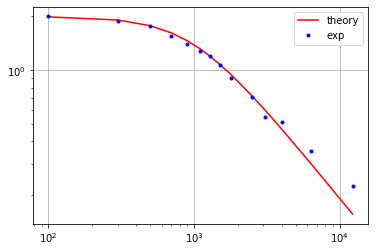

In [2]:
#
# Here's some sample data from a student lab. 
#
# f is linear frequency, g is measured "gain".
#
# You can use this idea: 
#
#        But use your own data! (R, C, f, g)
#

f = [100, 300, 500, 700, 900, 1100, 
     1300, 1500, 1800, 2500, 3100, 
     4000, 6400, 12300]

g = [2,1.88,1.7575,1.5606,1.3939,
     1.2813,1.1935,1.0645,.9032,
     .7097,.5484,.5161,.3548,.2258]

omega = 2*np.pi*np.array(f)

R=500
C=0.33e-6

X = 1.0/(omega*C)
Z = np.sqrt(R**2 + X**2)
G = 2.0*X/Z

pl.loglog(f, G,'r-',label='theory')
pl.loglog(f,g,'b.',label='exp')
pl.grid()
pl.legend()